In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import tensorflow as tf
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import os
import pandas as pd
import glob 
import scipy.io.wavfile
from sklearn.utils import shuffle
from math import sqrt
import sys
import keras
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
mylist= os.listdir('/content/drive/My Drive/Speech Emotion Recognition/meld/train')

In [0]:
main_path = "/content/drive/My Drive/Speech Emotion Recognition/meld/train"

In [6]:
a=bookmark=0
feeling_list = []
df = pd.DataFrame(columns=['feature'])
for y in (mylist):
    path = os.path.join(main_path, y)
    print(path)
    for p in os.listdir(path):
        try:
            print(p)
            #print('C:/Users/bhatt/Desktop/Jupyter Notebook/Speech-Emotion Recognition/meld/train/'+y +'/' +p)
            X, sample_rate = librosa.load('/content/drive/My Drive/Speech Emotion Recognition/meld/train/'+y +'/' +p, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
            sample_rate = np.array(sample_rate)
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
            feature = mfccs
            #[float(i) for i in feature]
            #feature1=feature[:135]
            df.loc[bookmark] = [feature]
            feeling_list.append(y)
            bookmark=bookmark+1
        except:
            pass
    print(bookmark)

/content/drive/My Drive/Speech Emotion Recognition/meld/train/happy
MEL_dia414_utt8_positive_HAP.wav
MEL_dia420_utt2_positive_HAP.wav
MEL_dia423_utt10_positive_HAP.wav
MEL_dia423_utt9_positive_HAP.wav
MEL_dia420_utt1_positive_HAP.wav
MEL_dia420_utt0_positive_HAP.wav
MEL_dia424_utt15_positive_HAP.wav
MEL_dia424_utt0_positive_HAP.wav
MEL_dia424_utt14_positive_HAP.wav
MEL_dia424_utt16_positive_HAP.wav
MEL_dia431_utt5_positive_HAP.wav
MEL_dia431_utt7_positive_HAP.wav
MEL_dia431_utt8_positive_HAP.wav
MEL_dia431_utt0_positive_HAP.wav
MEL_dia434_utt7_positive_HAP.wav
MEL_dia435_utt1_positive_HAP.wav
MEL_dia428_utt2_positive_HAP.wav
MEL_dia429_utt4_positive_HAP.wav
MEL_dia435_utt2_positive_HAP.wav
MEL_dia434_utt6_positive_HAP.wav
MEL_dia435_utt6_positive_HAP.wav
MEL_dia435_utt8_positive_HAP.wav
MEL_dia436_utt0_positive_HAP.wav
MEL_dia438_utt9_positive_HAP.wav
MEL_dia438_utt12_positive_HAP.wav
MEL_dia435_utt7_positive_HAP.wav
MEL_dia439_utt3_positive_HAP.wav
MEL_dia441_utt3_positive_HAP.wav
MEL

In [0]:
labels = pd.DataFrame(feeling_list)

In [8]:
df=df.fillna(0)
df

,feature
0,"[-14.429859514666601, -13.912536795753258, -13..."
1,"[-22.94153770076696, -21.512850627274602, -21...."
2,"[-18.41089965496093, -18.384139524027407, -17...."
3,"[-23.7597671197596, -25.279186208755196, -24.6..."
4,"[-10.75903070623413, -10.858598009349759, -12...."
...,...
7123,"[-15.290910131229882, -15.885781297741403, -17..."
7124,"[-13.90724438080956, -14.63398181512244, -15.5..."
7125,"[-21.96342510432208, -20.929575446336493, -22...."
7126,"[-6.47908405466592, -7.181619438867317, -9.557..."


In [0]:
df3 = pd.DataFrame(df['feature'].values.tolist())
df3=df3.fillna(0)

In [10]:
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,-14.429860,-13.912537,-13.418574,-12.457170,-12.334282,-13.685744,-13.196079,-13.447728,-13.347990,-11.784342,-10.952596,-11.088017,-13.780858,-13.107109,-13.100937,-13.590756,-13.860013,-13.461575,-13.765653,-14.348282,-15.710915,-16.304770,-15.290642,-15.367961,-14.585494,-13.709199,-14.002777,-15.052000,-13.386478,-13.559224,-13.779609,-12.203481,-11.885873,-11.371977,-9.804990,-9.878737,-10.633546,-10.221286,-10.422910,-10.308971,...,-21.225604,-24.879845,-24.14676,-24.120829,-25.451864,-25.995450,-21.921885,-20.362356,-21.791762,-25.340451,-24.395328,-24.871053,-24.470771,-24.074083,-25.608046,-33.052927,-52.930958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-22.941538,-21.512851,-21.039818,-20.932104,-18.356450,-18.701969,-16.806909,-14.226432,-15.858693,-18.086672,-17.324149,-17.424257,-16.611025,-16.645431,-18.409933,-18.389340,-19.761631,-20.834237,-19.443769,-18.663146,-19.955084,-23.337287,-24.299884,-21.588881,-20.336055,-21.784193,-23.383499,-24.445131,-23.027925,-23.233034,-25.233030,-26.169462,-25.670631,-24.859917,-23.946564,-25.293943,-26.613771,-23.955489,-22.931305,-23.683887,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-18.410900,-18.384140,-17.877348,-16.929829,-18.584619,-18.431925,-17.819123,-19.184261,-17.929288,-18.409205,-19.555193,-18.471228,-19.172500,-20.883449,-20.692743,-18.893573,-18.817589,-18.992964,-18.537458,-18.153985,-18.500456,-19.309637,-20.700800,-19.934346,-19.268576,-21.392686,-24.776664,-25.225039,-25.103444,-23.456875,-21.370954,-18.236387,-16.216507,-16.386030,-17.822398,-16.894147,-17.085519,-18.446012,-17.165626,-17.354383,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-23.759767,-25.279186,-24.641084,-24.251286,-25.868593,-26.117304,-23.113376,-23.299025,-21.335584,-20.874629,-23.052494,-23.132907,-22.771610,-22.972929,-22.847752,-22.171889,-25.122899,-26.823065,-24.817553,-25.067831,-24.135312,-27.597008,-28.047901,-28.112264,-29.035113,-28.521940,-25.045331,-26.439938,-28.573515,-29.044515,-27.644587,-24.805409,-24.619231,-26.852678,-25.969308,-25.374851,-26.162604,-25.423154,-26.109426,-29.165880,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-10.759031,-10.858598,-12.571813,-12.226802,-12.113865,-12.737262,-12.565254,-12.828419,-12.699674,-12.988440,-12.293764,-12.610579,-14.205313,-13.370428,-12.682647,-12.744683,-13.072630,-12.735578,-13.086149,-12.169200,-11.454179,-10.914503,-11.213292,-11.358484,-11.719966,-11.450547,-12.898924,-13.483818,-14.268570,-15.758831,-16.147215,-14.765598,-14.287596,-13.634707,-14.689232,-13.868171,-11.702686,-12.367186,-10.660471,-10.386718,...,-18.817373,-19.887111,-20.0

In [0]:
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [12]:
rnewdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
0,-14.429860,-13.912537,-13.418574,-12.457170,-12.334282,-13.685744,-13.196079,-13.447728,-13.347990,-11.784342,-10.952596,-11.088017,-13.780858,-13.107109,-13.100937,-13.590756,-13.860013,-13.461575,-13.765653,-14.348282,-15.710915,-16.304770,-15.290642,-15.367961,-14.585494,-13.709199,-14.002777,-15.052000,-13.386478,-13.559224,-13.779609,-12.203481,-11.885873,-11.371977,-9.804990,-9.878737,-10.633546,-10.221286,-10.422910,-10.308971,...,-24.879845,-24.14676,-24.120829,-25.451864,-25.995450,-21.921885,-20.362356,-21.791762,-25.340451,-24.395328,-24.871053,-24.470771,-24.074083,-25.608046,-33.052927,-52.930958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
1,-22.941538,-21.512851,-21.039818,-20.932104,-18.356450,-18.701969,-16.806909,-14.226432,-15.858693,-18.086672,-17.324149,-17.424257,-16.611025,-16.645431,-18.409933,-18.389340,-19.761631,-20.834237,-19.443769,-18.663146,-19.955084,-23.337287,-24.299884,-21.588881,-20.336055,-21.784193,-23.383499,-24.445131,-23.027925,-23.233034,-25.233030,-26.169462,-25.670631,-24.859917,-23.946564,-25.293943,-26.613771,-23.955489,-22.931305,-23.683887,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
2,-18.410900,-18.384140,-17.877348,-16.929829,-18.584619,-18.431925,-17.819123,-19.184261,-17.929288,-18.409205,-19.555193,-18.471228,-19.172500,-20.883449,-20.692743,-18.893573,-18.817589,-18.992964,-18.537458,-18.153985,-18.500456,-19.309637,-20.700800,-19.934346,-19.268576,-21.392686,-24.776664,-25.225039,-25.103444,-23.456875,-21.370954,-18.236387,-16.216507,-16.386030,-17.822398,-16.894147,-17.085519,-18.446012,-17.165626,-17.354383,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
3,-23.759767,-25.279186,-24.641084,-24.251286,-25.868593,-26.117304,-23.113376,-23.299025,-21.335584,-20.874629,-23.052494,-23.132907,-22.771610,-22.972929,-22.847752,-22.171889,-25.122899,-26.823065,-24.817553,-25.067831,-24.135312,-27.597008,-28.047901,-28.112264,-29.035113,-28.521940,-25.045331,-26.439938,-28.573515,-29.044515,-27.644587,-24.805409,-24.619231,-26.852678,-25.969308,-25.374851,-26.162604,-25.423154,-26.109426,-29.165880,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
4,-10.759031,-10.858598,-12.571813,-12.226802,-12.113865,-12.737262,-12.565254,-12.828419,-12.699674,-12.988440,-12.293764,-12.610579,-14.205313,-13.370428,-12.682647,-12.744683,-13.072630,-12.735578,-13.086149,-12.169200,-11.454179,-10.914503,-11.213292,-11.358484,-11.719966,-11.450547,-12.898924,-13.483818,-14.268570,-15.758831,-16.147215,-14.765598,-14.287596,-13.634707,-14.689232,-13.868171,-11.702686,-12.367186,-10.660471,-10.386718,...,-19.887111,-20.01057,-18.413323,-20.304518,

In [13]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
2302,-4.142498,-6.824653,-12.234084,-13.298441,-12.785699,-13.288764,-15.208798,-13.950934,-15.065930,-15.038251,-14.208708,-12.482961,-11.121850,-12.553166,-14.933206,-15.542822,-13.883713,-14.199658,-14.112831,-12.541894,-11.778846,-11.598306,-10.921514,-11.891572,-11.342893,-8.879319,-8.461904,-9.568589,-8.962606,-9.567284,-11.101371,-11.245381,-9.941940,-10.053655,-10.751778,-10.646345,-11.024657,-13.902721,-17.332927,-18.995460,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
4375,-15.541425,-10.149347,-4.519794,-5.009036,-7.651109,-8.068288,-8.262899,-7.487466,-9.247401,-11.484658,-12.380629,-11.394256,-13.373792,-11.778178,-9.072758,-8.745967,-7.964326,-8.126325,-8.114892,-10.331893,-9.629367,-7.708457,-10.006032,-10.240282,-9.781864,-9.512338,-9.963250,-8.079047,-7.271802,-4.615954,-3.506599,-4.629379,-5.922237,-5.601562,-6.535037,-6.409485,-6.154938,-6.569586,-8.472570,-9.062762,...,-11.814135,-8.050492,-6.361116,-5.757835,-7.120157,-8.418340,-8.729262,-7.456781,-7.302885,-7.026421,-7.978222,-7.630004,-6.528799,-7.712245,-7.019110,-6.325267,-7.163591,-6.363596,-5.096435,-6.995816,-8.180019,-9.180501,-9.981011,-7.935982,-7.181775,-8.944968,-7.663387,-6.253951,-8.452669,-8.775209,-9.208428,-10.242730,-6.319968,-5.786511,-5.613325,-5.506939,-5.693840,-6.453882,-4.098826,neutral
4888,-20.409536,-21.269445,-23.853036,-24.260455,-23.831577,-25.340280,-24.291627,-25.811880,-23.862695,-24.157418,-26.823142,-24.781997,-24.104752,-24.326355,-26.107635,-26.718687,-25.516221,-26.513284,-27.254480,-26.861043,-23.856516,-25.601847,-27.752962,-26.351342,-25.259915,-24.967458,-25.924380,-29.274653,-28.039833,-28.018557,-28.388843,-31.123070,-32.523800,-32.263507,-32.050703,-32.922675,-34.331694,-30.786534,-28.187408,-29.120452,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
3930,-25.172157,-24.561087,-24.524552,-23.098963,-23.387672,-24.173373,-23.473478,-21.498915,-22.722285,-22.749324,-22.791328,-22.491983,-21.460380,-21.300875,-19.245723,-18.531008,-19.543867,-19.447724,-19.453019,-18.594282,-19.819492,-19.940762,-20.201238,-21.049019,-19.503722,-20.213435,-22.338203,-22.354935,-20.850094,-20.339814,-19.943141,-18.463805,-18.045742,-19.544225,-18.511212,-18.102956,-18.415205,-18.820130,-18.906482,-17.751595,...,-14.602463,-14.010672,-13.487734,-15.417410,-17.075319,-16.886306,-19.238270,-20.161189,-21.518061,-20.610786,-20.815123,-23.769911,-23.810334,-22.213046,-24.531646,-26.578541,-25.252668,-24.684811,-20.721059,-15.746707,-14.568675,-15.808206,-16.118987,-15.704548,-16.985869,-20.775367,-20.312162,-20.679874,-20.046955,-17.275740,-17.139601,-19.817800,-21.420094,-23.177848,-24.855196,-24.165088,-23.638137,-21.865088,-22.115443,neutral
6605,-10.826727,-13.112485,-15.710544,-17.757055,-18.417047,-18.612410,-16.976790,-16.516827,-16.664667,-15.034908,-16.687687,-17.517034,-18.031709,-16.782971,-15.582601,-15.983187,-16.785406,-17.362668,-15.560601,-13.543043,-13.606656,-13.473661,-13.803834,-14.816377,-17.518260,-18.383591,-18.374834,-17.725564,-19.592143,-17.988881,-18.861902,-19.037317,-18.449952,-18.936560,-18.304789,-20.010036,-21.663791,-1

In [0]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [0]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [16]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(y_train)
print(y_test)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [18]:
print(x_traincnn.shape)
print(x_testcnn.shape)

(5728, 216, 1)
(1400, 216, 1)


In [19]:
y_train.shape

(5728, 5)

In [0]:
model = Sequential()

model.add(Conv1D(32, 28,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(64, 14,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(MaxPooling1D(pool_size=(2)))
#model.add(Conv1D(128, 7,padding='same'))
#model.add(Activation('relu'))
#model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.35))
model.add(Dense(5))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00003, decay=1e-6)

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 216, 32)           928       
_________________________________________________________________
activation_13 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 216, 64)           28736     
_________________________________________________________________
activation_14 (Activation)   (None, 216, 64)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 216, 64)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 108, 64)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6912)             

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
.cnnhistory=model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Train on 5728 samples, validate on 1400 samples
Epoch 1/100
5728/5728 [==============================] - 9s 2ms/step - loss: 1.0440 - acc: 0.6267 - val_loss: 1.0887 - val_acc: 0.6171
Epoch 2/100
5728/5728 [==============================] - 9s 2ms/step - loss: 1.0390 - acc: 0.6264 - val_loss: 1.1024 - val_acc: 0.6179
Epoch 3/100
5728/5728 [==============================] - 9s 2ms/step - loss: 1.0300 - acc: 0.6255 - val_loss: 1.1180 - val_acc: 0.6171
Epoch 4/100
5728/5728 [==============================] - 9s 2ms/step - loss: 1.0223 - acc: 0.6264 - val_loss: 1.1063 - val_acc: 0.6164
Epoch 5/100
5728/5728 [==============================] - 9s 2ms/step - loss: 1.0121 - acc: 0.6274 - val_loss: 1.1000 - val_acc: 0.6179
Epoch 6/100
5728/5728 [==============================] - 9s 2ms/step - loss: 1.0008 - acc: 0.6308 - val_loss: 1.1220 - val_acc: 0.6136
Epoch 7/100
5728/5728 [==============================] - 9s 2ms/step - loss: 0.9966 - acc: 0.6323 - val_loss: 1.1258 - val_acc: 0.6129
Epoch 8

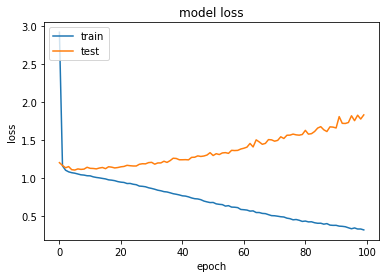

In [0]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 51.16%
